In [1]:
%pdb off
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack as fftp
from scipy import pi,sin,cos
import mousai as ms

Automatic pdb calling has been turned OFF


SyntaxError: no binding for nonlocal 'params' found (har_bal.py, line 164)

In [3]:
help(ms.hb_so)


Help on function hb_so in module mousai.har_bal:

hb_so(sdfunc, x0, omega, method='newton_krylov', num_harmonics=1, **kwargs)
    Harmonic balance solver for second order ODEs.
    
    Obtains the solution of a second order differential equation under the
    presumption that the solution is harmonic.
    
    Returns t (time), x (displacement), v (velocity), and a (acceleration)
    response of a second order linear ordinary differential
    equation defined by
    :math:`\ddot{\mathbf{x}}=f(\mathbf{x},\mathbf{v},\omega)`.
    
    Parameters
    ----------
    sdfunc: str
        name of function that returns **column vector** second derivative
        given omega and
        \*\*kwargs
    
        :math:`\ddot{\mathbf{x}}=f(\mathbf{x},\mathbf{v},\omega)`
    omega:  float
        assumed fundamental response frequency in radians per second.
    num_harmonics: int
        number of harmonics to presume. Constant term is always presumed.
    x0: ndarray
        n x m array where n i

In [66]:
x = ms.hb_so('duff_osc', sp.array([[0,1,-1]]), .9)

[autoreload of mousai.har_bal failed: Traceback (most recent call last):
  File "/Users/jslater/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jslater/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/jslater/anaconda/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/jslater/anaconda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/Users/jslater/D

ValueError: Unknown parameter kw

In [62]:
from scipy.optimize import newton_krylov
help(newton_krylov)


Help on function newton_krylov in module scipy.optimize.nonlin:

newton_krylov(F, xin, iter=None, rdiff=None, method='lgmres', inner_maxiter=20, inner_M=None, outer_k=10, verbose=False, maxiter=None, f_tol=None, f_rtol=None, x_tol=None, x_rtol=None, tol_norm=None, line_search='armijo', callback=None, **kw)
    Find a root of a function, using Krylov approximation for inverse Jacobian.
    
    This method is suitable for solving large-scale problems.
    
    Parameters
    ----------
    F : function(x) -> f
        Function whose root to find; should take and return an array-like
        object.
    x0 : array_like
        Initial guess for the solution
    rdiff : float, optional
        Relative step size to use in numerical differentiation.
    method : {'lgmres', 'gmres', 'bicgstab', 'cgs', 'minres'} or function
        Krylov method to use to approximate the Jacobian.
        Can be a string, or a function implementing the same interface as
        the iterative solvers in `scip

In [74]:
def my_quad(x, const = 2):
    return x**2-const

In [75]:
my_quad(1.75)

1.0625

In [77]:
kw = {'const':3}

In [80]:
x = newton_krylov(my_quad,1, const = 3)
x

ValueError: Unknown parameter const

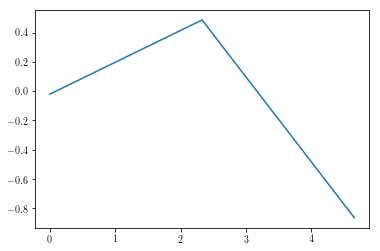

In [46]:
plt.plot(x[0].T,x[1].T)

In [4]:
sp.sin(pi)

1.2246467991473532e-16

In [5]:
a = sp.array([[sin(0),sin(2.*pi/3),sin(4.*(pi/3))],[cos(0),cos(2.*pi/3),cos(4.*(pi/3))]])

In [6]:
a

array([[ 0.       ,  0.8660254, -0.8660254],
       [ 1.       , -0.5      , -0.5      ]])

In [7]:
b = fftp.fft(a)
b

array([[  4.44089210e-16 +0.00000000e+00j,
         -2.22044605e-16 -1.50000000e+00j,
         -2.22044605e-16 +1.50000000e+00j],
       [ -2.22044605e-16 +0.00000000e+00j,
          1.50000000e+00 -5.76888806e-16j,
          1.50000000e+00 +5.76888806e-16j]])

In [8]:
omega = sp.array([0,1j,-1j])

In [9]:
omega

array([ 0.+0.j,  0.+1.j, -0.-1.j])

In [10]:
b[0,:]

array([  4.44089210e-16+0.j ,  -2.22044605e-16-1.5j,  -2.22044605e-16+1.5j])

In [11]:
b*omega

array([[  0.00000000e+00 +0.00000000e+00j,
          1.50000000e+00 -2.22044605e-16j,
          1.50000000e+00 +2.22044605e-16j],
       [ -0.00000000e+00 +0.00000000e+00j,
          5.76888806e-16 +1.50000000e+00j,
          5.76888806e-16 -1.50000000e+00j]])

In [12]:
c = fftp.ifft(b[0,:]*omega)

In [13]:
help(sp.fftpack.fft)

Help on function fft in module scipy.fftpack.basic:

fft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)`` where
    
    ``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.
    
    Parameters
    ----------
    x : array_like
        Array to Fourier transform.
    n : int, optional
        Length of the Fourier transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the fft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    z : complex ndarray
        with the elements::
    
            [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-

In [14]:
a

array([[ 0.       ,  0.8660254, -0.8660254],
       [ 1.       , -0.5      , -0.5      ]])

In [15]:
a.shape[1]

3

In [16]:
b = a.reshape([-1,1])
b

array([[ 0.       ],
       [ 0.8660254],
       [-0.8660254],
       [ 1.       ],
       [-0.5      ],
       [-0.5      ]])

In [17]:
b.reshape([-1,3])

array([[ 0.       ,  0.8660254, -0.8660254],
       [ 1.       , -0.5      , -0.5      ]])

In [18]:
v =_har_deriv(2*pi, a)
v

NameError: name '_har_deriv' is not defined

In [ ]:
bb = sp.append(a,v,axis=0)
bb

In [19]:
_har_deriv(2*pi,bb)

NameError: name '_har_deriv' is not defined

In [20]:
plt.plot(t,a.T,t,v.T)

NameError: name 't' is not defined

In [21]:
t = sp.linspace(0,.1,6)
t = t[0:-1]
t

array([ 0.  ,  0.02,  0.04,  0.06,  0.08])

In [22]:
aa

NameError: name 'aa' is not defined

In [23]:
aa = sp.array([sin(10*t),2*pi*10*cos(10*t)])
aa

array([[  0.        ,   0.19866933,   0.38941834,   0.56464247,
          0.71735609],
       [ 62.83185307,  61.57939922,  57.87196905,  51.85736609,  43.7753736 ]])

In [25]:
aa

array([[  0.        ,   0.19866933,   0.38941834,   0.56464247,
          0.71735609],
       [ 62.83185307,  61.57939922,  57.87196905,  51.85736609,  43.7753736 ]])

In [26]:
62.8/8.787


7.146921588710594

In [27]:
def func(**kwargs):
    print(kwargs)
    print(kwargs['g'])

In [28]:
func(g = 1)

{'g': 1}
1


In [29]:
import numpy as np
def F(x):
    return np.cos(x) + x[::-1] - [1, 2, 3, 4]
import scipy.optimize
x = scipy.optimize.broyden1(F, [1,1,1,1], f_tol=1e-14)
print(x)
np.cos(x) + x[::-1]


[ 4.04674914  3.91158389  2.71791677  1.61756251]


array([ 1.,  2.,  3.,  4.])

In [30]:
x[::-1]

array([ 1.61756251,  2.71791677,  3.91158389,  4.04674914])

In [31]:
np.cos(4.0467)+1.617-1

-0.00060115645740976831

0:  |F(x)| = 626.642; step 1; tol 0.000157679
1:  |F(x)| = 234.794; step 1; tol 0.12635
2:  |F(x)| = 114.961; step 1; tol 0.215759
3:  |F(x)| = 24.1248; step 1; tol 0.0396341
4:  |F(x)| = 1.53245; step 1; tol 0.00363151
5:  |F(x)| = 0.118376; step 1; tol 0.0053703
6:  |F(x)| = 0.00888316; step 1; tol 0.00506815
7:  |F(x)| = 0.000125266; step 1; tol 0.000178966
Residual: 5.8124e-06


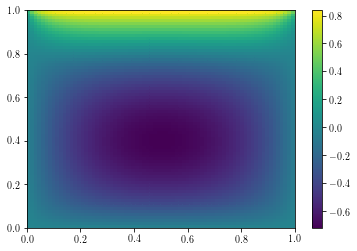

In [32]:
import numpy as np
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y - 10*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual(sol)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol)
plt.colorbar()
plt.show()

In [33]:
def F(x):
    return np.cos(x) + x[::-1] - [1, 2, 3, 4]

In [41]:
a = 'broyden1'
import scipy.optimize as spo 

In [39]:
x = scipy.optimize.broyden1(F, [1,1,1,1], f_tol=1e-14)
x

array([ 4.04674914,  3.91158389,  2.71791677,  1.61756251])

In [42]:
a = 'broyden1'
import scipy.optimize as spo 
x = eval('scipy.optimize.'+ a + '(F, [1,1,1,1], f_tol=1e-14)')
x

array([ 4.04674914,  3.91158389,  2.71791677,  1.61756251])

In [43]:
a = 'newton_krylov'
x = eval('scipy.optimize.'+ a + '(F, [1,1,1,1], f_tol=1e-14)')
x

array([ 4.04674914,  3.91158389,  2.71791677,  1.61756251])

In [45]:
x = globals()[a](F, [1,1,1,1], f_tol=1e-14)
x

array([ 4.04674914,  3.91158389,  2.71791677,  1.61756251])

In [81]:
#help(globals()[a])

In [83]:
x = scipy.optimize.broyden1(F, [1,1,1,1], f_tol=1e-14)

NameError: name 'scipy' is not defined

In [3]:
import numpy as np
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros

In [2]:
def fun(x,y):
    return x+y+x*y+x**2-7

In [94]:
funx = lambda x: fun(x,y)

In [97]:
y = 3
funx(1)

1

In [98]:
newton_krylov(funx,2)

array(0.8284271247493729)

In [99]:
help(np.asarray)

Help on function asarray in module numpy.core.numeric:

asarray(a, dtype=None, order=None)
    Convert the input to an array.
    
    Parameters
    ----------
    a : array_like
        Input data, in any form that can be converted to an array.  This
        includes lists, lists of tuples, tuples, tuples of tuples, tuples
        of lists and ndarrays.
    dtype : data-type, optional
        By default, the data-type is inferred from the input data.
    order : {'C', 'F'}, optional
        Whether to use row-major (C-style) or
        column-major (Fortran-style) memory representation.
        Defaults to 'C'.
    
    Returns
    -------
    out : ndarray
        Array interpretation of `a`.  No copy is performed if the input
        is already an ndarray with matching dtype and order.  If `a` is a
        subclass of ndarray, a base class ndarray is returned.
    
    See Also
    --------
    asanyarray : Similar function which passes through subclasses.
    ascontiguousarray : C

In [100]:
help(np.fromfunction)

Help on function fromfunction in module numpy.core.numeric:

fromfunction(function, shape, **kwargs)
    Construct an array by executing a function over each coordinate.
    
    The resulting array therefore has a value ``fn(x, y, z)`` at
    coordinate ``(x, y, z)``.
    
    Parameters
    ----------
    function : callable
        The function is called with N parameters, where N is the rank of
        `shape`.  Each parameter represents the coordinates of the array
        varying along a specific axis.  For example, if `shape`
        were ``(2, 2)``, then the parameters in turn be (0, 0), (0, 1),
        (1, 0), (1, 1).
    shape : (N,) tuple of ints
        Shape of the output array, which also determines the shape of
        the coordinate arrays passed to `function`.
    dtype : data-type, optional
        Data-type of the coordinate arrays passed to `function`.
        By default, `dtype` is float.
    
    Returns
    -------
    fromfunction : any
        The result of the

In [103]:
yy = np.linspace(0,10,100)
yy

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

In [106]:
x = sp.zeros_like(yy)

In [119]:
%%timeit
for i, y in enumerate(yy):
    x[i] = newton_krylov(funx,2)
    #print(y,x[i],fun(x[i],y))  

249 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
from numba import jit

In [124]:
@jit(nopython=False)
def findx(yy):
    for i, y in enumerate(yy):
        x[i] = newton_krylov(funx,2)
    return x

In [126]:
%%timeit
x = findx(yy)

250 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [131]:
import scipy.optimize.nonlin as spnl
help(spnl.broyden1)

Help on function broyden1 in module scipy.optimize.nonlin:

broyden1(F, xin, iter=None, alpha=None, reduction_method='restart', max_rank=None, verbose=False, maxiter=None, f_tol=None, f_rtol=None, x_tol=None, x_rtol=None, tol_norm=None, line_search='armijo', callback=None, **kw)
    Find a root of a function, using Broyden's first Jacobian approximation.
    
    This method is also known as \"Broyden's good method\".
    
    Parameters
    ----------
    F : function(x) -> f
        Function whose root to find; should take and return an array-like
        object.
    x0 : array_like
        Initial guess for the solution
    alpha : float, optional
        Initial guess for the Jacobian is ``(-1/alpha)``.
    reduction_method : str or tuple, optional
        Method used in ensuring that the rank of the Broyden matrix
        stays low. Can either be a string giving the name of the method,
        or a tuple of the form ``(method, param1, param2, ...)``
        that gives the name of 

In [6]:
def func(x,y):
    def fund(x,y):
        return x+y
    z = fund(x,y)

    return 2*z


In [7]:
func(1,2)

6